In [6]:
import pipeline
import datajoint as dj
from pipeline import mice, experiment, meso, reso
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stimulus = dj.create_virtual_module('stimulus', 'pipeline_stimulus')

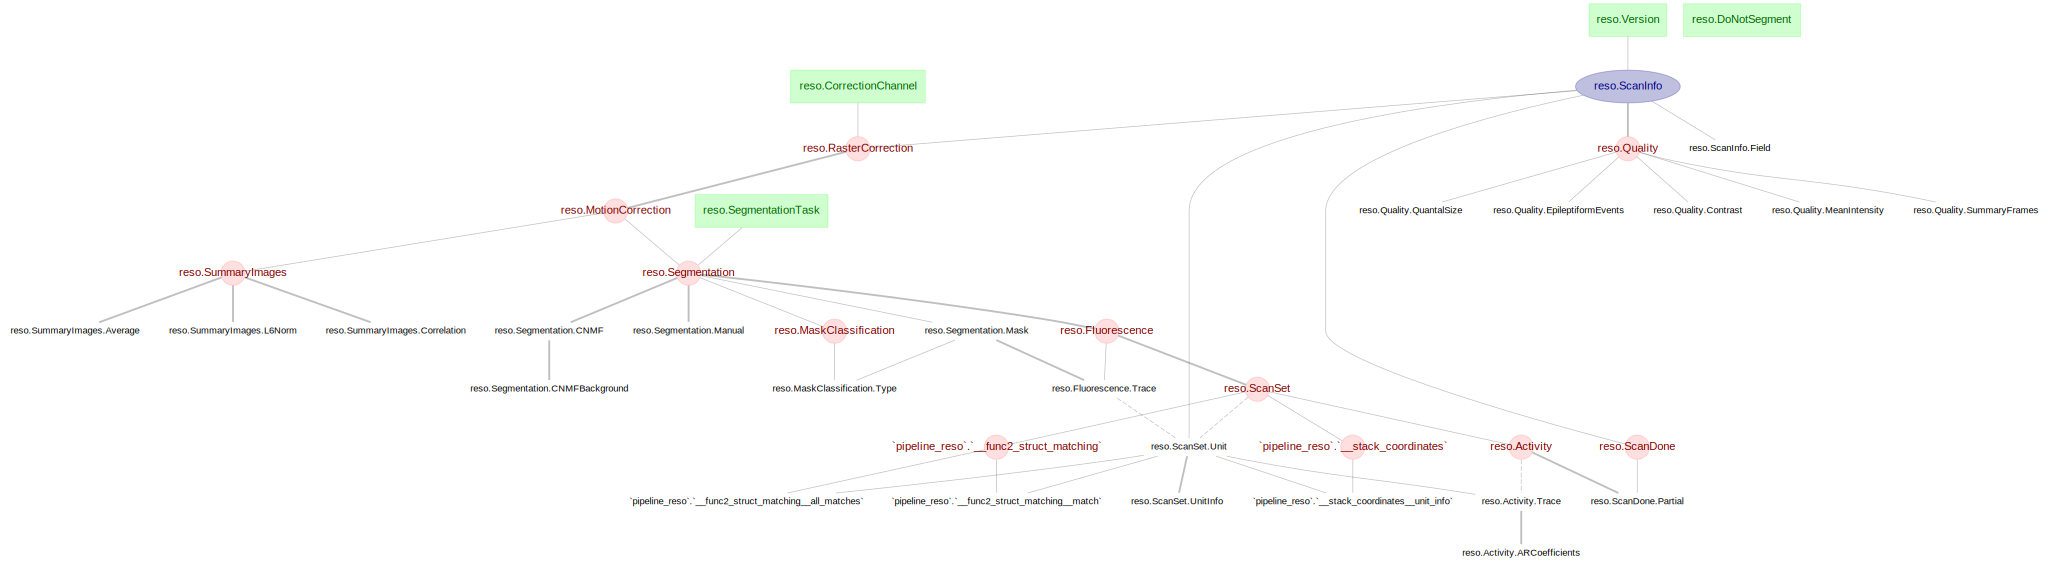

In [7]:
dj.ERD(reso)

We will use this scan in the reso pipeline: `key=dict(animal_id=21067, session=16, scan_idx=2)`
1. Fetch traces for neurons (soma), calculate variance and z-score each trace.
2. Choose 5 neruons with highest variance, and plot their activity from the 10th minute (approximately) into the scan. 
3. For the same 5 neurons, plot their masks.

In [9]:
reso.Segmentation()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,field slice in scan,channel,segmentation_method,segmentation_time automatic
0,1137,2,1,1,1,1,2018-06-07 16:55:08
0,1137,2,1,1,1,3,2018-03-03 18:41:30
691,1,1,1,1,1,3,2018-05-24 00:49:39
691,2,2,1,1,1,3,2018-05-23 23:43:13
691,3,1,1,1,1,3,2018-05-24 00:45:58
691,3,2,1,1,1,3,2018-05-24 14:48:35
691,4,1,1,1,1,3,2018-05-24 01:48:49


In [10]:
reso.Activity.Trace()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,segmentation_method,unit_id unique per scan & segmentation method,spike_method spike inference method,field slice in scan,channel,trace
0,1137,2,1,3,1,5,1,1,=BLOB=
0,1137,2,1,3,2,5,1,1,=BLOB=
0,1137,2,1,3,3,5,1,1,=BLOB=
0,1137,2,1,3,4,5,1,1,=BLOB=
0,1137,2,1,3,5,5,1,1,=BLOB=
0,1137,2,1,3,6,5,1,1,=BLOB=
0,1137,2,1,3,7,5,1,1,=BLOB=


In [11]:
reso.Activity.Trace.heading

# deconvolved calcium acitivity
animal_id            : int                          # id number
session              : smallint                     # session index for the mouse
scan_idx             : smallint                     # number of TIFF stack file
pipe_version         : smallint                     # 
segmentation_method  : tinyint                      # 
unit_id              : int                          # unique per scan & segmentation method
spike_method         : tinyint                      # spike inference method
---
field                : tinyint                      # slice in scan
channel              : tinyint                      # 
trace                : longblob                     # 